In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import os
import time
import sys
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
#learning_rate:[1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate

learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rate:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.summary()
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled, y_valid),
                   epochs = 100,
                   callbacks = callbacks)
    histories.append(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 150us/sample - loss: 5.4779 - val_loss: 4.7346
Epoch 2/100
11610/11610 [==============================] - 1s 59us/sample - loss: 3.8289 - val_loss: 3.4013
Epoch 3/100
11610/11610 [==============================] - 1s 59us/sample - loss: 2.8211 - val_loss: 2.5688
Epoch 4/100
11610/11610 [==============================] - 1s 61us/sample - loss: 2.1786 - val_loss: 2.0309
Epoch 5/100
11610/11610 [=============

11610/11610 [==============================] - 1s 58us/sample - loss: 0.5667 - val_loss: 0.6125
Epoch 71/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5648 - val_loss: 0.6105
Epoch 72/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5630 - val_loss: 0.6086
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 89us/sample - loss: 3.5274 - val_loss: 2.4313
Epoch 2/100
11610/11610 [======================

11610/11610 [==============================] - 1s 77us/sample - loss: 0.6673 - val_loss: 0.6898
Epoch 4/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6224 - val_loss: 0.6547
Epoch 5/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5915 - val_loss: 0.6284
Epoch 6/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5678 - val_loss: 0.6053
Epoch 7/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5494 - val_loss: 0.5860
Epoch 8/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5343 - val_loss: 0.5696
Epoch 9/100
11610/11610 [==============================] - 1s 100us/sample - loss: 0.5220 - val_loss: 0.5576
Epoch 10/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5118 - val_loss: 0.5445
Epoch 11/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5033 - val_loss: 0.5374
Epoch 12/100
11610/11610 [===========

11610/11610 [==============================] - 2s 135us/sample - loss: 1.8827 - val_loss: 0.6783
Epoch 2/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5268 - val_loss: 0.4994
Epoch 3/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4428 - val_loss: 0.4496
Epoch 4/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4140 - val_loss: 0.4212
Epoch 5/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.3934 - val_loss: 0.4097
Epoch 6/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3934 - val_loss: 0.4039
Epoch 7/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3777 - val_loss: 0.3960
Epoch 8/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.3743 - val_loss: 0.3865
Epoch 9/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.3659 - val_loss: 0.4343
Epoch 10/100
11610/11610 [=============

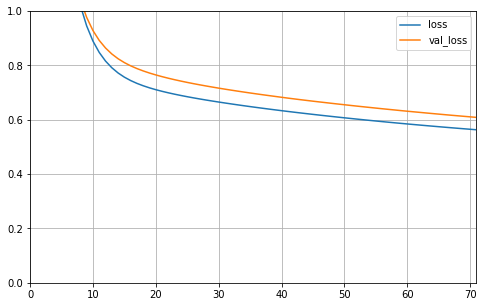

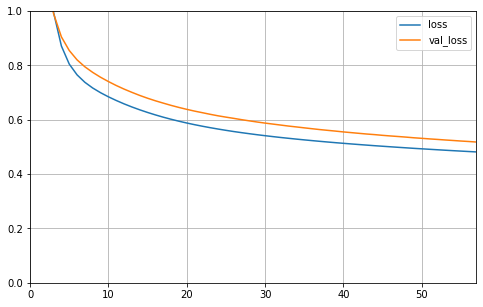

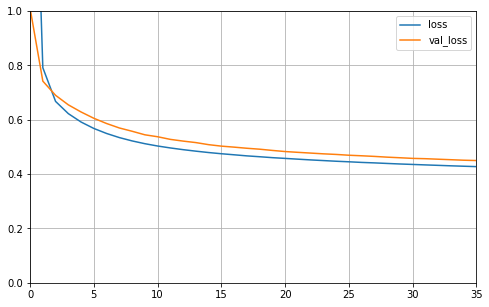

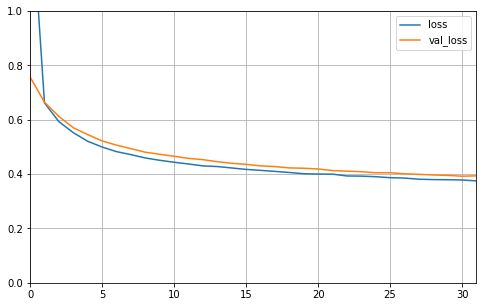

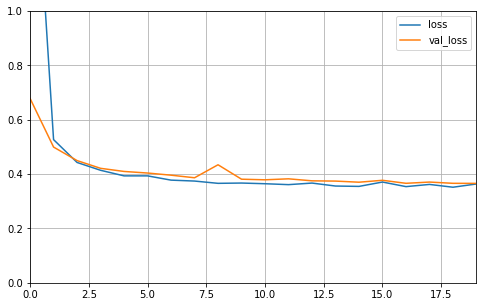

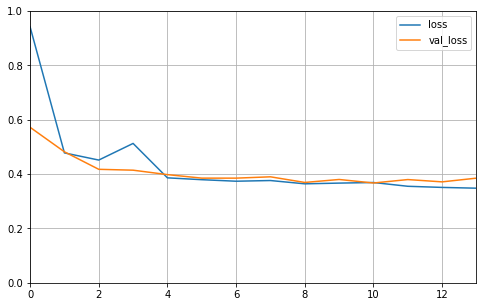

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rate, histories):
    plot_learning_curves(history)